# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load dataset

In [5]:
df = pd.read_csv('hotel_reviews_rating.csv')
df.head()

,reviews_text,reviews_rating
0,Pleasant 5 min walk along the sea front to the...,4
1,Really lovely hotel. Stayed on the very top fl...,5
2,Ett mycket bra hotell. Det som drog ner betyge...,5
3,We stayed here for four nights in October. The...,5
4,We stayed here for four nights in October. The...,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34691 entries, 0 to 34690
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_text    34691 non-null  object
 1   reviews_rating  34691 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 542.2+ KB


# Distribution customer ratings

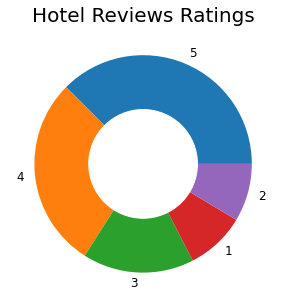

In [7]:
ratings = df["reviews_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers)

central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

# Sentiment Analysis

## Import libraries for sentiment analysis

In [8]:
import nltk
nltk.download('stopwords')

from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import spacy
import en_core_web_sm
from textblob import Word
nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thiphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thiphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/thiphan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
# Cleaning data

stop = stopwords.words('english')

df['reviews_text'] = df['reviews_text'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['reviews_text'] = df['reviews_text'].str.replace(r'[^\w\s]','')
df['reviews_text'] = df['reviews_text'].str.replace(r'\d+', '')
df['reviews_text'] = df['reviews_text'].str.lower()
df['reviews_text'] = df['reviews_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['reviews_rating'] = df['reviews_rating'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['reviews_rating'] = df['reviews_rating'].str.replace(r'[^\w\s]','')
df['reviews_rating'] = df['reviews_rating'].str.replace(r'\d+', '')
df['reviews_rating'] = df['reviews_rating'].str.lower()
df['reviews_rating'] = df['reviews_rating'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



/var/folders/__/js30bc3506q4lzh4l2tsxnfr0000gn/T/ipykernel_3078/928427204.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews_text'] = df['reviews_text'].str.replace(r'[^\w\s]','')
/var/folders/__/js30bc3506q4lzh4l2tsxnfr0000gn/T/ipykernel_3078/928427204.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews_text'] = df['reviews_text'].str.replace(r'\d+', '')
/var/folders/__/js30bc3506q4lzh4l2tsxnfr0000gn/T/ipykernel_3078/928427204.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews_rating'] = df['reviews_rating'].str.replace(r'[^\w\s]','')
/var/folders/__/js30bc3506q4lzh4l2tsxnfr0000gn/T/ipykernel_3078/928427204.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews_rating'] = df['reviews_rating'].str.replace(r'\d+', '')


In [42]:
#Define a function to get rid of stopwords present in the messages
#from nltk.corpus import stopwords

import string

def message_text_process(mess):
    # Check characters to see if there are punctuations
    no_punctuation = [char for char in mess if char not in string.punctuation]
    # now form the sentence.
    no_punctuation = ''.join(no_punctuation)
    # Now eliminate any stopwords
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]    

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(analyzer=message_text_process)

In [44]:
# define the functions to find and print the top comments

n_top_words = 20
lda = LatentDirichletAllocation()

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
def find_top_comments(corpus):
    tfidf_transformer = vectorizer.fit_transform(corpus)
    tf_feature_names = vectorizer.get_feature_names()    
    lda.fit_transform(tfidf_transformer)
    
    print_top_words(lda, tf_feature_names, n_top_words)

## Top comments of reviews

In [45]:
find_top_comments(df['reviews_text'])

/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0: united share businesswith yp statesand visitors opinion neighborhood across ok wad intended tennessee excellant upgrading crappy railway mayor myrtle anglers
Topic #1: e da muito caf na com localizao bom manh tima um bem di excelente timo colazione wiped atendimento em grimy
Topic #2: el muy de la und es en sehr que das die war las zimmer para der los bien todo con
Topic #3: universal studios fixing biloxi excellent nice fishermans defiantly jetted breakfast walkin spread plunger newly froze free cheese poolhot bene nites
Topic #4: room hotel stay clean breakfast night bed would nice good one desk rooms staff like didnt front get us could
Topic #5: great staff stay nice hotel friendly clean breakfast room comfortable helpful place would service excellent good location wonderful stayed rooms
Topic #6: de et trs la le un pour en est chambre bien les pas une htel dans bon nous du og
Topic #7: hotel great location nice close restaurants good clean room staff breakfast stay walkin

## WordCloud for Review text

In [46]:
import re

# create lists of review and combine list to string

# create list of documents
review_set = [review for review in df['reviews_text']]

# Remove new line characters
review_set = [re.sub(r'\s+', ' ', sent) for sent in review_set]

# Remove distracting single quotes
review_set = [re.sub("\'", "", sent) for sent in review_set]

<function matplotlib.pyplot.show(close=None, block=None)>

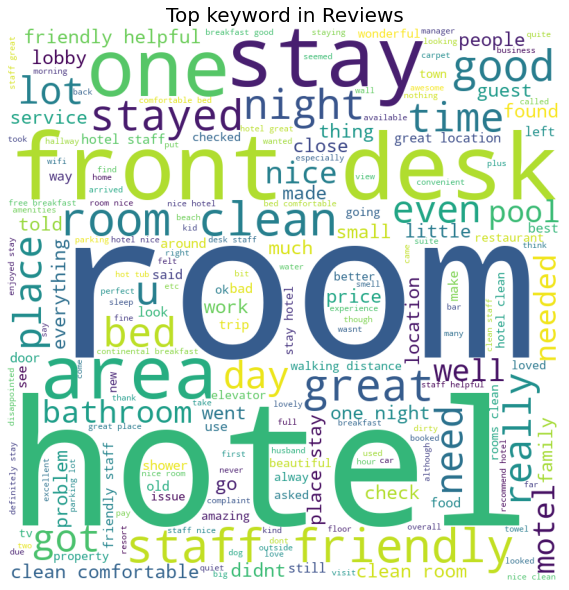

In [47]:
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)
text = " ".join(review for review in df['reviews_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.title('Top keyword in Reviews', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show

## Add new column to dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [50]:
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['reviews_text']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['reviews_text']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['reviews_text']]
df

,reviews_text,reviews_rating,Positive,Negative,Neutral
0,pleasant min walk along sea front water bus re...,,0.303,0.058,0.639
1,really lovely hotel stayed top floor surprised...,,0.646,0.027,0.327
2,ett mycket bra hotell det som drog ner betyget...,,0.000,0.000,1.000
3,stayed four nights october hotel staff welcomi...,,0.448,0.000,0.552
4,stayed four nights october hotel staff welcomi...,,0.448,0.000,0.552
...,...,...,...,...,...
35023,best best family stayed grin bear cabin christ...,,0.530,0.020,0.450
35024,amazing vacation beautiful cabin stayed long w...,,0.516,0.000,0.484
35025,husband stayed tree tops bearfoot resort manag...,,0.294,0.023,0.683
35026,share opinion businesswith yp visitors across ...,,0.417,0.000,0.583


## Most people think about hotel services

In [52]:
x = sum(df['Positive'])
y = sum(df['Negative'])
z = sum(df['Neutral'])

def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print('Positive 😊 ')
    elif (b > a) and (b > c):
        print('Negative 😠 ')
    else:
        print('Neutral 🙂 ')

sentiment_score(x, y, z)

Neutral 🙂 


## Sentiment scores

In [53]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  11613.480999999903
Negative:  2184.5510000000104
Neutral:  21158.917000000154
